<a href="https://colab.research.google.com/github/Uli-Gonzalez/Challenge-Alura-Store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head(2)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359


#1. Análisis de facturación



###Ingreso total de cada tienda:

####Resolución con aplicación de una función:

In [ ]:
def ing_t(dftienda):
  resultado_ing = dftienda['Precio'].sum()
  return resultado_ing


In [ ]:
#Tienda 1:
ing_t1 = ing_t(tienda)
print('Ingreso tienda 1: ',ing_t1)
#Tienda 2:
ing_t2 = ing_t(tienda2)
print('Ingreso tienda 2: ',ing_t2)
#Tienda 3:
ing_t3 = ing_t(tienda3)
print('Ingreso tienda 3: ',ing_t3)
#Tienda 4:
ing_t4 = ing_t(tienda4)
print('Ingreso tienda 4: ',ing_t4)

Ingreso tienda 1:  1150880400.0
Ingreso tienda 2:  1116343500.0
Ingreso tienda 3:  1098019600.0
Ingreso tienda 4:  1038375700.0


####Dataframe resumen - Ingreso total por tienda::

In [ ]:
df_ingresos = pd.DataFrame({
    'Tienda': ['Tienda1', 'Tienda2', 'Tienda3', 'Tienda4'],
    'Ingreso_total': [
        ing_t(tienda),
        ing_t(tienda2),
        ing_t(tienda3),
        ing_t(tienda4)
    ]
})
df_ingresos



,Tienda,Ingreso_total
0,Tienda1,1.150880e+09
1,Tienda2,1.116344e+09
2,Tienda3,1.098020e+09
3,Tienda4,1.038376e+09


In [ ]:
df_ingresos.set_index('Tienda', inplace=True)

In [ ]:
import matplotlib.pyplot as plt


####Gráfico - Ingreso total por tienda:

In [ ]:
colors = ['#0d3b66', '#145da0', '#1ca3ec', '#d6f6ff']

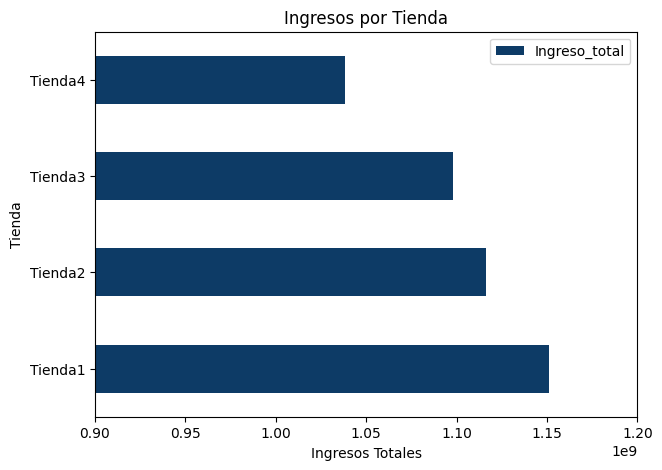

In [ ]:
df_ingresos.plot(
    kind='barh',
    figsize=(7,5),
    color= colors
)

plt.xlabel('Ingresos Totales')
plt.ylabel('Tienda')
plt.title('Ingresos por Tienda')
plt.xlim(900000000, 1200000000)
plt.show()


# 2. Ventas por categoría

### Ventas por categoría por tiendas:

Se verificó previamente con el método .info() y con .isnull().sum(), la NO existencia de datos nulos que interfieran en los resultados.

####Resolución con aplicación de una función:

In [ ]:
#Resolución con aplicación de función:
def vta_ctg(df):
  resultado = df.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False)
  return resultado

In [ ]:
#Tienda 1
vta_ctg_t1 = vta_ctg(tienda)
vta_ctg_t1

,Producto
Categoría del Producto,
Muebles,465
Electrónicos,448
Juguetes,324
Electrodomésticos,312
Deportes y diversión,284
Instrumentos musicales,182
Libros,173
Artículos para el hogar,171


In [ ]:
#Tienda 2
vta_ctg_t2 = vta_ctg(tienda2)
vta_ctg_t2

,Producto
Categoría del Producto,
Muebles,442
Electrónicos,422
Juguetes,313
Electrodomésticos,305
Deportes y diversión,275
Instrumentos musicales,224
Libros,197
Artículos para el hogar,181


In [ ]:
#Tienda 3
vta_ctg_t3 = vta_ctg(tienda3)
vta_ctg_t3

,Producto
Categoría del Producto,
Muebles,499
Electrónicos,451
Juguetes,315
Electrodomésticos,278
Deportes y diversión,277
Libros,185
Artículos para el hogar,177
Instrumentos musicales,177


In [ ]:
#Tienda 4
vta_ctg_t4 = vta_ctg(tienda4)
vta_ctg_t4

,Producto
Categoría del Producto,
Muebles,480
Electrónicos,451
Juguetes,338
Deportes y diversión,277
Electrodomésticos,254
Artículos para el hogar,201
Libros,187
Instrumentos musicales,170


In [ ]:
df_categorias = pd.concat(
    [vta_ctg_t1, vta_ctg_t2, vta_ctg_t3, vta_ctg_t4],
    axis=1
)

In [ ]:
df_categorias

,Producto,Producto,Producto,Producto
Categoría del Producto,,,,
Muebles,465,442,499,480
Electrónicos,448,422,451,451
Juguetes,324,313,315,338
Electrodomésticos,312,305,278,254
Deportes y diversión,284,275,277,277
Instrumentos musicales,182,224,177,170
Libros,173,197,185,187
Artículos para el hogar,171,181,177,201


####Dataframe resumen - Ventas por categoría:

In [ ]:
df_categorias.columns = ['Tienda1', 'Tienda2', 'Tienda3', 'Tienda4']
df_categorias

,Tienda1,Tienda2,Tienda3,Tienda4
Categoría del Producto,,,,
Muebles,465,442,499,480
Electrónicos,448,422,451,451
Juguetes,324,313,315,338
Electrodomésticos,312,305,278,254
Deportes y diversión,284,275,277,277
Instrumentos musicales,182,224,177,170
Libros,173,197,185,187
Artículos para el hogar,171,181,177,201


####Gráfico - Ventas por categoría:

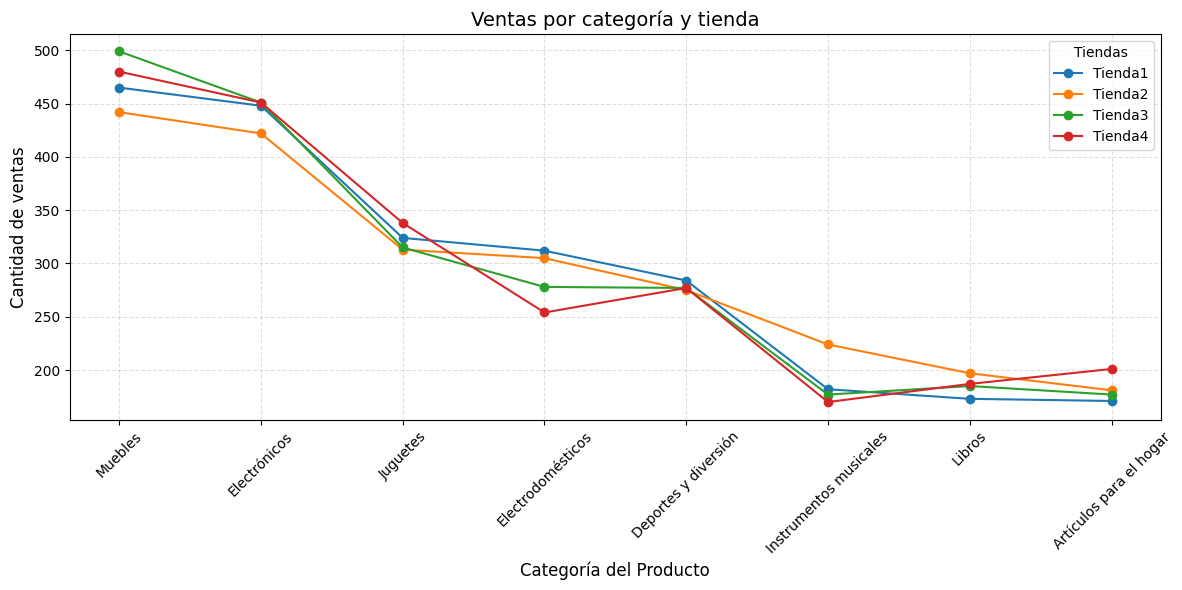

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# Graficar cada columna como una línea
for tienda in df_categorias.columns:
    plt.plot(df_categorias.index, df_categorias[tienda], marker='o', label=tienda)

plt.title('Ventas por categoría y tienda', fontsize=14)
plt.xlabel('Categoría del Producto', fontsize=12)
plt.ylabel('Cantidad de ventas', fontsize=12)

plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.4)

plt.legend(title='Tiendas')
plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


###Valoraciones promedio para cada tienda:

####Resolución con aplicación de una función:

In [ ]:
#Resolución con aplicación de funció:
def calif_prom(df):
  resultado = round(df['Calificación'].mean(),2)
  return resultado

In [ ]:
#Tienda 1
calif_prom_t1 = calif_prom(tienda)
calif_prom_t1

np.float64(3.98)

In [ ]:
#Tienda 2
calif_prom_t2 = calif_prom(tienda2)
calif_prom_t2

np.float64(4.04)

In [ ]:
#Tienda 3
calif_prom_t3 = calif_prom(tienda3)
calif_prom_t3

np.float64(4.05)

In [ ]:
#Tienda 4
calif_prom_t4 = calif_prom(tienda4)
calif_prom_t4

np.float64(4.0)

####Dataframe resumen - Calificación promedio de la tienda:

In [ ]:
df_calificacion = pd.DataFrame({
    'Tienda': ['Tienda1', 'Tienda2', 'Tienda3', 'Tienda4'],
    'Calificación_promedio': [
        calif_prom(tienda),
        calif_prom(tienda2),
        calif_prom(tienda3),
        calif_prom(tienda4)
    ]
})
df_calificacion

,Tienda,Calificación_promedio
0,Tienda1,3.98
1,Tienda2,4.04
2,Tienda3,4.05
3,Tienda4,4.00


####Gráfico - Calificación promedio de la tienda:

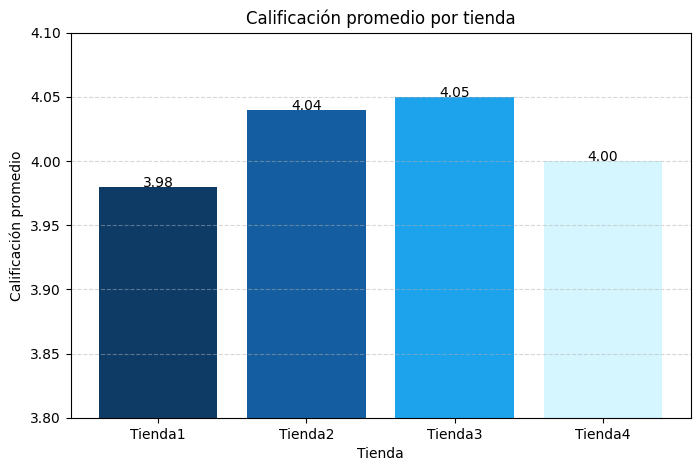

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(df_calificacion['Tienda'], df_calificacion['Calificación_promedio'],color = colors)

plt.title('Calificación promedio por tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación promedio')
plt.ylim(3.8, 4.1)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Etiquetas encima de cada barra
for i, v in enumerate(df_calificacion['Calificación_promedio']):
    plt.text(i, v , f'{v:.2f}', ha='center')

# 4. Productos más y menos vendidos

###Conteo de productos más y menos vendidos por tienda:

####Resolución con aplicación de una función:

In [ ]:
#Resolución con aplicación de función
def mas_vendido(df):
  resultado= df.groupby('Producto')['Producto'].count().sort_values(ascending=False).head(3)
  return resultado

def menos_vendido(df):
  resultado = df.groupby('Producto')['Producto'].count().sort_values(ascending=True).head(3)
  return resultado


In [ ]:
#Tienda 1
mas_vendido_t1 = mas_vendido(tienda)
mas_vendido_t1

,Producto
Producto,
Armario,60
TV LED UHD 4K,60
Microondas,60


In [ ]:
menos_vendido_t1 = menos_vendido(tienda)
menos_vendido_t1

,Producto
Producto,
Auriculares con micrófono,33
Celular ABXY,33
Olla de presión,35


In [ ]:
#Tienda 2
mas_vendido_t2 = mas_vendido(tienda2)
mas_vendido_t2

,Producto
Producto,
Iniciando en programación,65
Microondas,62
Batería,61


In [ ]:
menos_vendido_t2 = menos_vendido(tienda2)
menos_vendido_t2

,Producto
Producto,
Juego de mesa,32
Impresora,34
Mesa de comedor,34


In [ ]:
#Tienda 3
mas_vendido_t3 = mas_vendido(tienda3)
mas_vendido_t3

,Producto
Producto,
Kit de bancas,57
Mesa de comedor,56
Cama king,56


In [ ]:
menos_vendido_t3 = menos_vendido(tienda3)
menos_vendido_t3

,Producto
Producto,
Bloques de construcción,35
Set de vasos,36
Mochila,36


In [ ]:
#Tienda 4
mas_vendido_t4 = mas_vendido(tienda4)
mas_vendido_t4

,Producto
Producto,
Cama box,62
Cubertería,59
Cama king,56


In [ ]:
menos_vendido_t4 = menos_vendido(tienda4)
menos_vendido_t4

,Producto
Producto,
Guitarra eléctrica,33
Armario,34
Guitarra acústica,37


# 5. Envío promedio por tienda

###Costo de envío promedio para cada tienda:

####Resolución con aplicación de una función:

In [ ]:
#Resolución con aplicación de funciones:

def cost_env(df):
  resultado = round(df['Costo de envío'].mean(),1)
  return resultado

In [ ]:
#Tienda 1
cost_env_t1 = cost_env(tienda)
cost_env_t1

np.float64(26018.6)

In [ ]:
#Tienda 2
cost_env_t2 = cost_env(tienda2)
cost_env_t2

np.float64(25216.2)

In [ ]:
#Tienda 3
cost_env_t3 = cost_env(tienda3)
cost_env_t3

np.float64(24805.7)

In [ ]:
#Tienda 4
cost_env_t4 = cost_env(tienda4)
cost_env_t4

np.float64(23459.5)

###Dataframe resumen - Costo de envío promedio:


In [ ]:
df_costo_envio = pd.DataFrame({
  'Tienda':['Tienda1','Tienda2','Tienda3','Tienda4'],
  'Costo de envío promedio':
  [cost_env(tienda),
  cost_env(tienda2),
  cost_env(tienda3),
  cost_env(tienda4)]
})
df_costo_envio

,Tienda,Costo de envío promedio
0,Tienda1,26018.6
1,Tienda2,25216.2
2,Tienda3,24805.7
3,Tienda4,23459.5


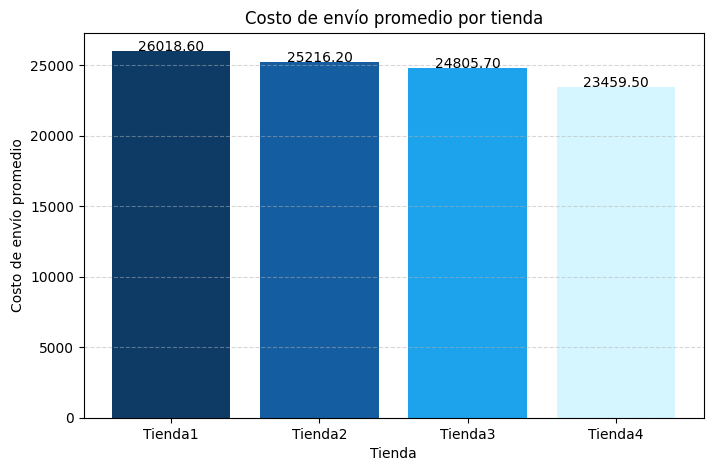

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(df_costo_envio['Tienda'], df_costo_envio['Costo de envío promedio'], color=colors)

plt.title('Costo de envío promedio por tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo de envío promedio')
#plt.ylim(3.8, 4.1)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Etiquetas encima de cada barra
for i, v in enumerate(df_costo_envio['Costo de envío promedio']):
    plt.text(i, v , f'{v:.2f}', ha='center')

#**INFORME FINAL**
##Recomendación de la tienda a vender:

###Introducción:
Con el objetivo de asesorar al Sr. Juan en la elección de la tienda a vender de su cadena Alura Store, se realizó una análisis de facturación, un análisis de ventas por categoría de productos, un análisis de calificación de las tiendas por parte de sus clientes, un análisis de los productos más y menos vendidos y un análisis de los costos de envío de sus productos. Los resultados obtenidos luego del procesamiento de los datos fueron graficados para facilitar el análisis y obtener información para la toma de desiciones.

###Desarrollo:
Presentación de resultados

####Análisis de facturación
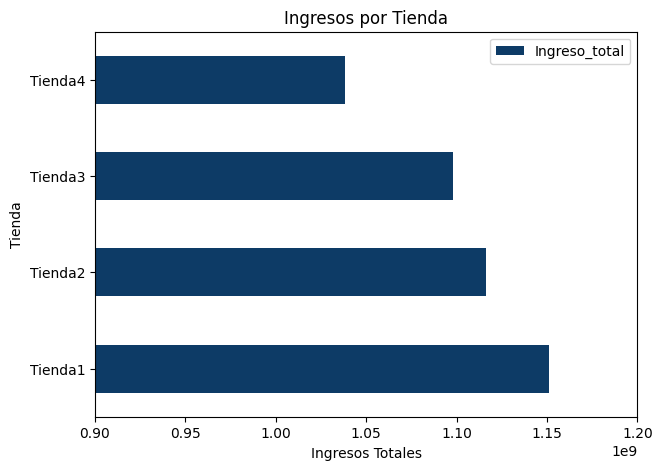

####Análisis de ventas por categoría
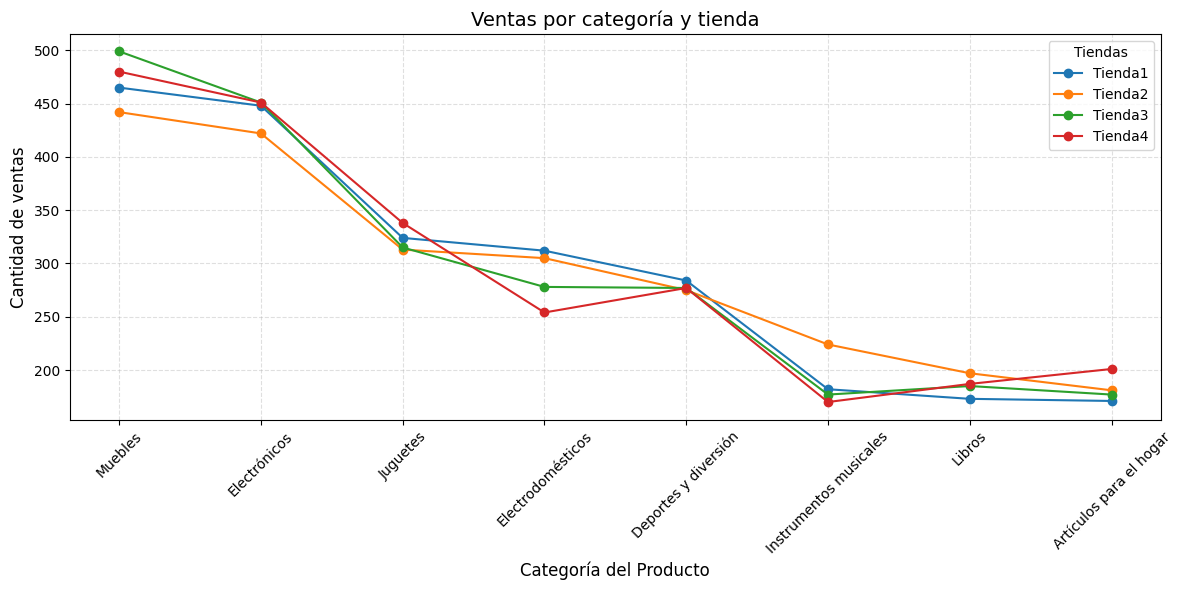

####Análisis de calificación de clientes (satisfacción)
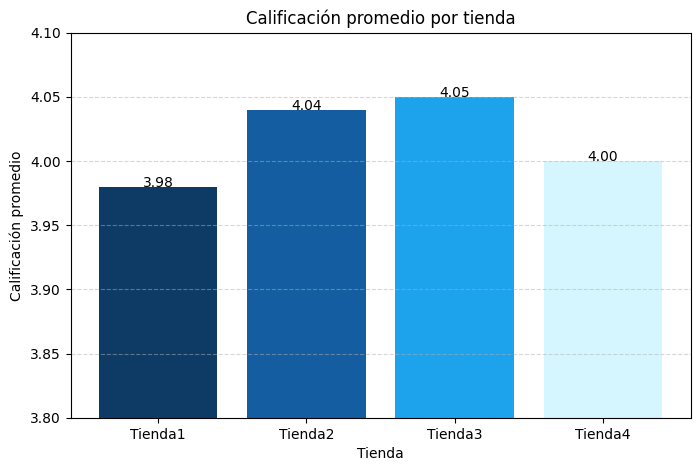

####Análisis de costo de envío
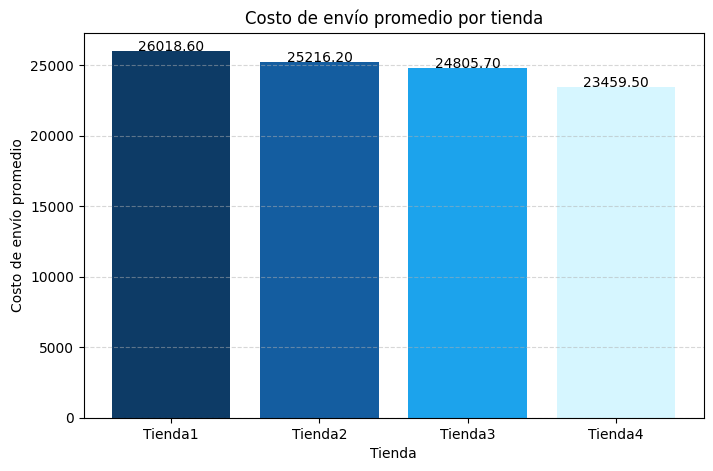

###Conclusión:
Se recomienda vender la Tienda N°1.



####Justificación:
De acuerdo con el análisis de facturación, la Tienda N.º 1 presenta los ingresos más elevados en comparación con las demás tiendas. Este indicador económico la convierte en una opción atractiva para potenciales inversionistas.

Si bien esta tienda representa una importante fuente de ingresos, presenta problemas operativos que no se encuentran alineados con los valores de la marca comercial Alura Store. Por este motivo, se confirma su elección para ser vendida y así desvincularla de la marca mencionada. Lo anterior se refleja en el análisis de calificaciones, en el cual la Tienda N.º 1 obtiene el puntaje más bajo, lo que denota una mayor insatisfacción de sus clientes, sumado a los elevados costos de envío de sus productos respecto de las demás tiendas.